# IMDB Movie Analysis
In this notebook I will be conducting some Exploratory Data Analysis on IMDB Movie information and producing a **Multi-Linear Regression Model** to determine which variables are the best predictors of the Gross Profit a film makes.

**Table of Contents:**
* Section 1: Introduction & Importing Data
* Section 2: Data Preparation
    * Section 2.1: Missing Values
    * Section 2.2: Converting Variables (from objects to integers)
    * Section 2.3: Identifying and Removing Outliers
* Section 3: Exploratory Data Analysis
    * Section 3.1: Correlation of Continuous Variables
    * Section 3.2: Comparision Using Visualisation
* Section 4: Regression Model
    * Section 4.1: Prediction
    * Section 4.2: Error Distribution
    * Section 4.3: Test Model
* Section 5: Conclusion

## Section 1: Introduction & Importing Data

Dataset is from Kaggle
write some other interesting info

|Variable | Description |
|:------- |:----------- |
|Poster_Link | Link of the poster that imdb using |
|Series_Title | Name of the movie |
|Released_Year | Year at which that movie released |
|Certificate | Certificate earned by that movie |
|Runtime | Total runtime of the movie |
|Genre | Genre of the movie |
|IMDB_Rating | Rating of the movie at IMDB site |
|Overview | Summary of movie |
|Meta_score | Score earned by the movie |
|Director | Name of the Director |
|Star1, Star2, Star3, Star4 | Name of the Stars in the movie |
|No_of_votes | Total number of votes |
|Gross | Money earned by that movie |

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option("display.precision",3)

In [2]:
#import data
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


## Section 2: Data Preparation
In this section bla bla

* Missing Values
* Converting Variables (from objects to integers)
* Identifying and Removing Outliers

### 2.1: Identifying any Missing Values

Total number of missing 
Reason behind dropping NA - where is data missing

In [3]:
print('The total number of missing values in this dataset is: ', df.isna().sum().sum())
df.isna().sum()/(len(df))*100

The total number of missing values in this dataset is:  427


Poster_Link       0.0
Series_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [4]:
df = df.dropna()

### 2.2: Converting Variables
Converting some numerical variables from objects to floats so that they can be considered continuous variables and can be used as part of the regression model. In this instance, I am doing it in order to determine outliers relating to the Release Year, which can only be done once it is recognised as an integer of some sort.

In [5]:
df_cont = pd.DataFrame()
df_cont = df_cont.assign(Released_Year = df.Released_Year, Runtime = df.Runtime, 
                         IMDB_Rating = df.IMDB_Rating, Meta_score = df.Meta_score, 
                         No_of_Votes = df.No_of_Votes, Gross = df.Gross)
df_cont

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,1994,142 min,9.3,80.0,2343110,"28,341,469"
1,1972,175 min,9.2,100.0,1620367,"134,966,411"
2,2008,152 min,9.0,84.0,2303232,"534,858,444"
3,1974,202 min,9.0,90.0,1129952,"57,300,000"
4,1957,96 min,9.0,96.0,689845,"4,360,000"
...,...,...,...,...,...,...
990,1971,157 min,7.6,77.0,30144,"696,690"
991,1970,144 min,7.6,50.0,45338,"1,378,435"
992,1967,78 min,7.6,65.0,166409,"141,843,612"
994,1964,87 min,7.6,96.0,40351,"13,780,024"


In [6]:
df_cont['Released_Year'] = pd.to_numeric(df_cont['Released_Year'],errors = 'coerce')
#df_cont.dtypes

### 2.3: Identifying and Removing Outliers
In this section I will remove the much older movies as I am assuming they are outliers, and outliers skew the distribution of the dataset which could have significant impacts on the analysis later. 

First, in order to determine what the outliers are I need to have a closer look at the distribution of the `Released_Year` of the films. To identify these outliers within the dataset I must first calculate the interquartile range. Then, using these values to produce the `upper and lower bounds` for the dataset which will inform which values are categorised as outliers.

In [7]:
df_cont.Released_Year.describe()

# Define quartiles and calculate interquartile range
Q1_year = df_cont.Released_Year.quantile(0.25)
Q3_year = df_cont.Released_Year.quantile(0.75)

IQR = Q3_year - Q1_year

#Find lower bound of Age
upper_bound = Q3_year +(1.5 * IQR)
lower_bound = Q3_year -(1.5 * IQR)

upper_bound, lower_bound

(2044.5, 1975.5)

The upper bound date of `2058` is in the future so I will be disregarding the `upper bound` for obvious reasons. For my analysis I will be comparing distributions relating to specific `Stars1` and `Directors` who do not fall within the lower bound area and therefore I do not need to exclude this data.

I am assuming that by removing the outliers, the mean and median will decrease as the extreme values above the upper bound have been removed.

Below, it shows how to remove the outliers if this is something you would like to do as part of your analysis.

In [8]:
#Calculate how many outliers there are in the dataset
#year_outlier = df_cont.Released_Year[((df_cont.Released_Year > (lower_bound)))]

# New df only has values smaller than upper bound
#no_outliers = df_cont.Released_Year[((df_cont.Released_Year < (lower_bound)))]
#no_outliers.describe()

## Section 3: Exploratory Analysis

### 3.1: Correlation of Continuous Variables
This section focuses on the correlation between the `Meta_score`, `No_of_Votes` , and `IMDB_Rating`. The concept of correlation is that two variables change together: as one increases so does the other **(positive correlation)** or as one increases the other decreases **(negative correlation)**.

### Section 3.1.1: The Correlation Matrix
This matrix provides numerical values to help determine whether or not their is a correlation between these variables. I have chosen to also provide a heatmap below as it is often clearer to visualise the relationship between variables with clear visualisations rather than tables.

In [9]:
df.corr()

,IMDB_Rating,Meta_score,No_of_Votes
IMDB_Rating,1.000,0.281,0.623
Meta_score,0.281,1.000,0.030
No_of_Votes,0.623,0.030,1.000


#### Heat Maps
Heat Maps are often used to display correlation between continous variables.

It is clear from the heat map below that there is a positive correlation between all three variables. The strongest correlation is between `No_of_Votes` and `IMDB_Rating` which suggests that the higher the number of votes for a given film, the higher you can expect the `IMDB_Rating` to be.

In addition, there is a weaker but still positive correlation between the `IMDB_Rating` and the `Meta_score` which suggests to some degree these scoring systems have some form of relationship.

Interestingly though, the `Meta_score` and `No_of_votes` have nearly no correlation.

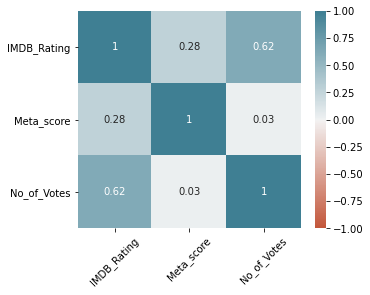

In [10]:
fig,ax = plt.subplots(1,1, figsize=(5,4))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 10})
_y = plt.yticks(rotation=0, fontsize=10)
_x = plt.xticks(rotation=45, fontsize=10)

<AxesSubplot:xlabel='Meta_score', ylabel='No_of_Votes'>

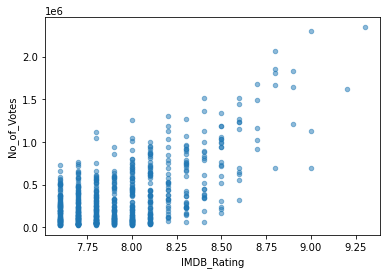

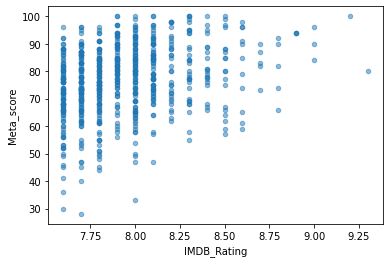

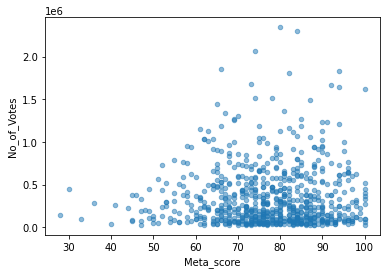

In [11]:
df.plot(kind='scatter', x='IMDB_Rating', y='No_of_Votes', alpha=0.5)
df.plot(kind='scatter', x='IMDB_Rating', y='Meta_score', alpha=0.5)
df.plot(kind='scatter', x='Meta_score', y='No_of_Votes', alpha=0.5)

### Section 3.2: Comparison Using Visualisation

#### Directors, IMDB Rating and Meta Score

These boxplots give a clear indiccation of the distribution of `IMDB Ratings` for certain `Directors` and `Star1`'s.

**Christopher Nolan** has the highest `IMDB rating` mean at just under 8.5 but who can be surprised with Box Office hits like `Inception` and `Interstellar`. 

**Martin Scorsese** and **Quentin Tarantino** have the same mean rating of 8.2 which begs the question is `Goodfellas` on the same level as `Pulp Fiction`? How about `Inglorious Basterds` and `The Departed`?

The most shocking of these is that **Steven Spielberg** has the lowest mean IMDB rating at 8, with hits like `Schindler's List` and the `Indiana Jones` franchise it just seems disrespectful. 

However, with **Spielberg** having the second-highest Meta score mean, and **Scorsese** the highest it does suggest that maybe that is a more accurate rating for films than IMDB? What do you think?

In [12]:
IMDB_above8 = df.loc[df.IMDB_Rating > 8]
nolan = df.loc[df.Director == 'Christopher Nolan']
scorsese = df.loc[df.Director == 'Martin Scorsese']
spielberg = df.loc[df.Director == 'Steven Spielberg']
scott = df.loc[df.Director == 'Ridley Scott']
tarantino = df.loc[df.Director == 'Quentin Tarantino']

top_directors = pd.concat([nolan, scorsese, spielberg, scott, tarantino])

Text(0, 0.5, 'Meta Score')

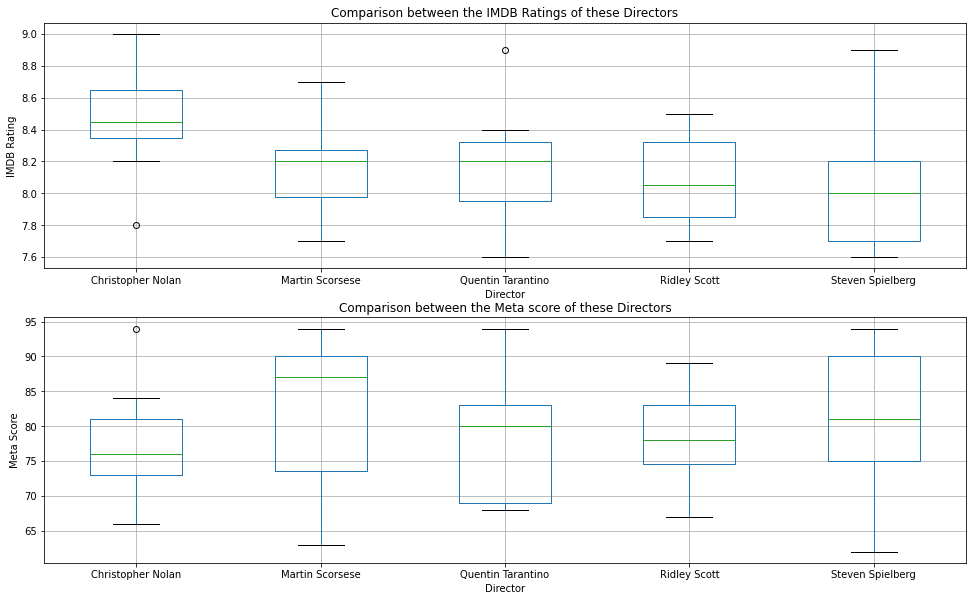

In [13]:
fig, (a1,a2) = plt.subplots(2,1, figsize=(16,10))

top_directors.boxplot(column='IMDB_Rating', by='Director', ax=a1)
top_directors.boxplot(column='Meta_score', by='Director', ax=a2)

fig.suptitle('')
a1.set_title('Comparison between the IMDB Ratings of these Directors') 
a2.set_title('Comparison between the Meta score of these Directors')
a1.set_ylabel('IMDB Rating')
a2.set_ylabel('Meta Score')

#### Stars, IMDB Rating and Meta Score

Unsurprisngly the King of the Acting World, **Leonardo DiCaprio** has the highest `IMDB Rating` mean at 8.1, which seems quite low considering some of his great films including, `Inception`, `Titanic` and `The Departed` just to name a few. I would expect his IMDB Rating mean to be much higher considering this but he is often quite underrated so that is something to factor in - I will leave it at this for now. *(I could go on all day)*.

Next is **Jamie Foxx** and **Brad Pitt** which again seems rather surprising. No doubt these ratings are due to `Django Unchained` *(which Leo is also in)* and `Fight Club`, maybe `Ray` and `Inglorious Basterds` also?

Very slightly behind is **Christian Bale** with an `IMDB Rating` mean of 8 which I know must be due to `The Dark Knight` but he also performs well in `The Prestige` and `American Psycho`.

Similarly as with the directors, the Meta Score changes the order with **Denzel Washington** moving from the lowest `IMDB Rating` mean to the 3rd highest `Meta Score` mean which I am sure is due to household favourites such as `Training Day` and `American Gangster`.

In [14]:
leo = df.loc[df.Star1 == 'Leonardo DiCaprio']
pitt = df.loc[df.Star1 == 'Brad Pitt']
bale = df.loc[df.Star1 == 'Christian Bale']
foxx = df.loc[df.Star1 == 'Jamie Foxx']
denzel = df.loc[df.Star1 == 'Denzel Washington']

top_star1 = pd.concat([leo, pitt, bale, denzel, foxx])

Text(0, 0.5, 'Meta Score')

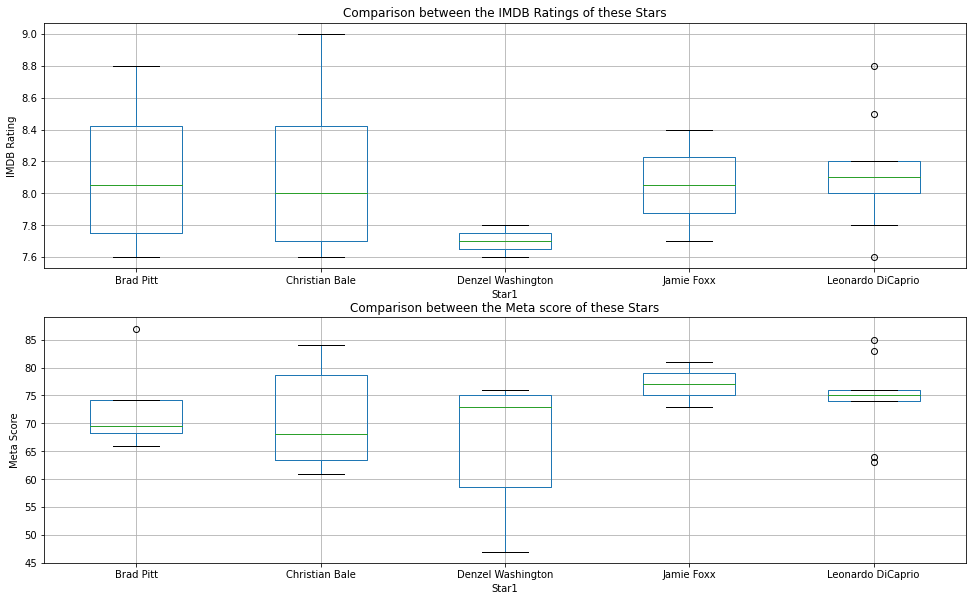

In [15]:
fig, (a1,a2) = plt.subplots(2,1, figsize=(16,10))

top_star1.boxplot(column='IMDB_Rating', by='Star1', ax=a1)
top_star1.boxplot(column='Meta_score', by='Star1', ax=a2)

fig.suptitle('')
a1.set_title('Comparison between the IMDB Ratings of these Stars') 
a2.set_title('Comparison between the Meta score of these Stars')
a1.set_ylabel('IMDB Rating')
a2.set_ylabel('Meta Score')

Overall, for both `Directors` and `Stars`, I would say that the `Meta Scores` provide a better reflection on what ordinary people would rate films *(ironically as this is who rates IMDB)* so I would consider these more reliable than IMDB which is very interesting as prior to this analysis IMDB was like my Bible.

#### Directors, Stars and Release Years

It's safe to say that the distribution of the medians for Directors is between 1990 and 2010. Scorsese has the largest range which nearly covers this entire period whereas Directors like Spielberg have not released many films since the turn of the Millenium, which is in contrast to Tarantino and Nolan, where thw majority of their films have been releaed since 2000.

In comparison, the Stars have a much smaller distribution compared to the directors - with the interquartile range not exceeding 10 years for any. This has primarily confirmed which most people know which is ones career as a Director is generally longer than those of the Actors.

Text(0, 0.5, 'Release Year')

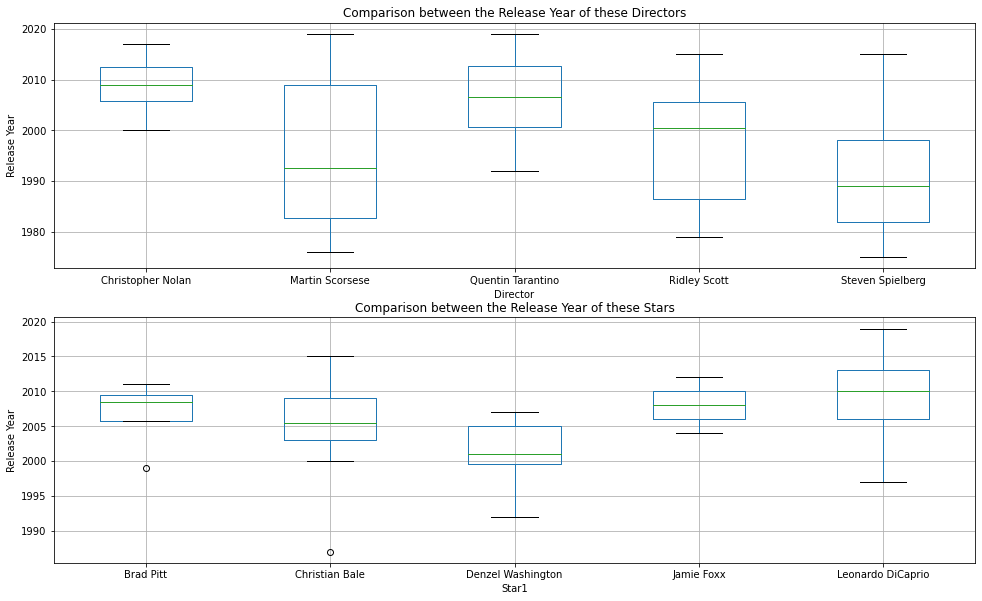

In [16]:
#convert Release Year values to integers so they can be plotted
top_directors['Released_Year'] = pd.to_numeric(top_directors['Released_Year'],errors = 'coerce')
top_star1['Released_Year'] = pd.to_numeric(top_star1['Released_Year'],errors = 'coerce')

fig, (a1,a2) = plt.subplots(2,1, figsize=(16,10))

top_directors.boxplot(column='Released_Year', by='Director', ax=a1)
top_star1.boxplot(column='Released_Year', by='Star1', ax=a2)

fig.suptitle('')
a1.set_title('Comparison between the Release Year of these Directors') 
a2.set_title('Comparison between the Release Year of these Stars')
a1.set_ylabel('Release Year')
a2.set_ylabel('Release Year')

## Section 4: Regression Model

### Section 4.1: Prediction
Using `Released_Year`, `IMDB_Rating`, `No_of_votes`, `Director` and `Star1` as predictor variables, I will produce a linear regression model to predict the `Gross` Profit of films.

In [17]:
#Numerate Gross so that it can be used as target variable
top_films = pd.concat([top_directors, top_star1])
top_films["Gross"] = top_films["Gross"].str.replace(",","").astype(int)

director_dum = pd.get_dummies(top_films.Director, drop_first=True)
star1_dum = pd.get_dummies(top_films.Star1, drop_first=True)

The `r-squared` coefficient is `0.875` which suggests that the variables included within this model can explain approximately `87%` of the outcomes from this model. Therefore, these variables can provide a prediction that largely explains the `Gross` for IMDB films.

In [18]:
y = top_films.Gross
x = np.column_stack((top_films.Released_Year, top_films.IMDB_Rating, top_films.No_of_Votes,
                    director_dum, star1_dum))

reg = LinearRegression().fit(x,y)
beta_ryear = reg.coef_[0]
beta_imdb = reg.coef_[1]
beta_votes = reg.coef_[2]
beta_director = reg.coef_[3]
beta_star = reg.coef_[4]

print('The R2 coefficient is %4.3f' % reg.score(x,y))
print('The intercept is: %4.1f' % reg.intercept_)
print('The regression coefficients are: ', reg.coef_)

The R2 coefficient is 0.875
The intercept is: 2352750.1
The regression coefficients are:  [ 9.13729561e+05 -2.70935074e+08  3.87501672e+02  1.33345397e+08
 -2.03814607e+08  1.51656055e+08 -6.23229797e+07 -8.44720047e+07
 -3.51163098e+07  2.45132375e+07  9.51808004e+07  4.39348680e+08
 -1.79666195e+07 -1.44929869e+08 -1.39300782e+08  3.99650407e+07
 -1.29524018e+08 -1.55058448e+08  7.51339463e+07  2.42637355e+08
 -1.81772015e+08  1.99395003e+08  2.90172050e+08  3.84699620e+08
  2.76338698e+08  2.75552101e+08  7.04886472e+07  2.74743201e+08
  3.31817591e+07  5.15564950e+08  3.18143461e+07 -5.26945150e+07
  3.52488200e+08  1.00838359e+08  1.39436052e+08  3.87382764e+08
  1.24531852e+08  2.35590528e+08  2.48899234e+08  3.34814257e+08
  2.70547712e+08  3.62276010e+08  8.35669128e+07  3.68378949e+08
  8.73937763e+07  1.32944143e+08  4.98251569e+07]


### Section 4.2: Error distribution

I have provided a scatter graph below so that you can see a visual representation of the `regression model`. The **black dots** are from the dataset provided and the **blue line** is the **linear regression line** produced using the predictor variables.

The closer the data points are to the blue line, the more accurate the prediction. The majority of data points are concentrated in the area surrounding the blue line which demonstrates that this model is very accurate. There are a few datapoints that are further away, but this is unsurprising as there were a few outliers highlighted during the course of my analysis.

Text(0, 0.5, 'Actual Value')

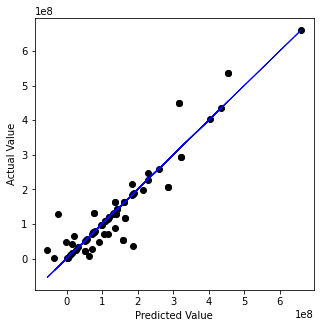

In [19]:
y_hat = reg.predict(x)
fig, a = plt.subplots(1,1, figsize=(5,5))

a.scatter(y_hat, y, color='black')
a.plot(y_hat, y_hat, color='blue', linewidth='1')
a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

Below is a histogram that shows the distribution of the prediction error of the regression model, as you can see the **median error** is between 0 and 0.3 which suggests that the regression model is highly accurate.|

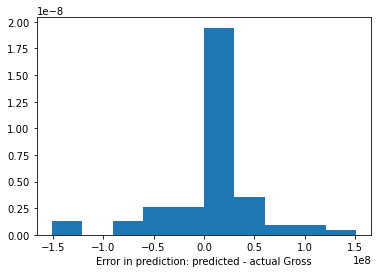

In [20]:
fig, a1 = plt.subplots(1, 1)
residuals = y_hat - y
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction: predicted - actual Gross')

### Section 4.3: Test Model
Any model always has to be validated in some way so I will be using the below method as it is a fairly small dataset and this means that I do not need to split my dataset into `Training` and `Validation` sets.

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))])
                
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, x, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [5.29228861e+07 1.14439634e+08 6.06331686e+07 7.85423858e+07
 3.03333264e+07]


In [22]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
67374280.23653331


In [23]:
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_hat, squared=False))

Root of the mean squared error: 47460713.72


## Section 5: Conclusion
The mean squared error and mean absolute error are not too dissimilar in the grand scheme of things as the `Gross` values in this dataset go into the billions therefore values such as `67,374,280.24` (MAE) and `47,460,713.72` (MSE) are not terrible. Initially the huge value was a bit of a shock, however it is clear from the data that there is a wide distribution of the `Gross` for films therefore it is unsurprising that the error appears large (before asjusted to the magnitude of the target variable).